In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("CSV_Files/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.shape

(768, 9)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
X = df.drop(columns = "Outcome", axis = 1)
y = df["Outcome"]

In [13]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

<AxesSubplot:>

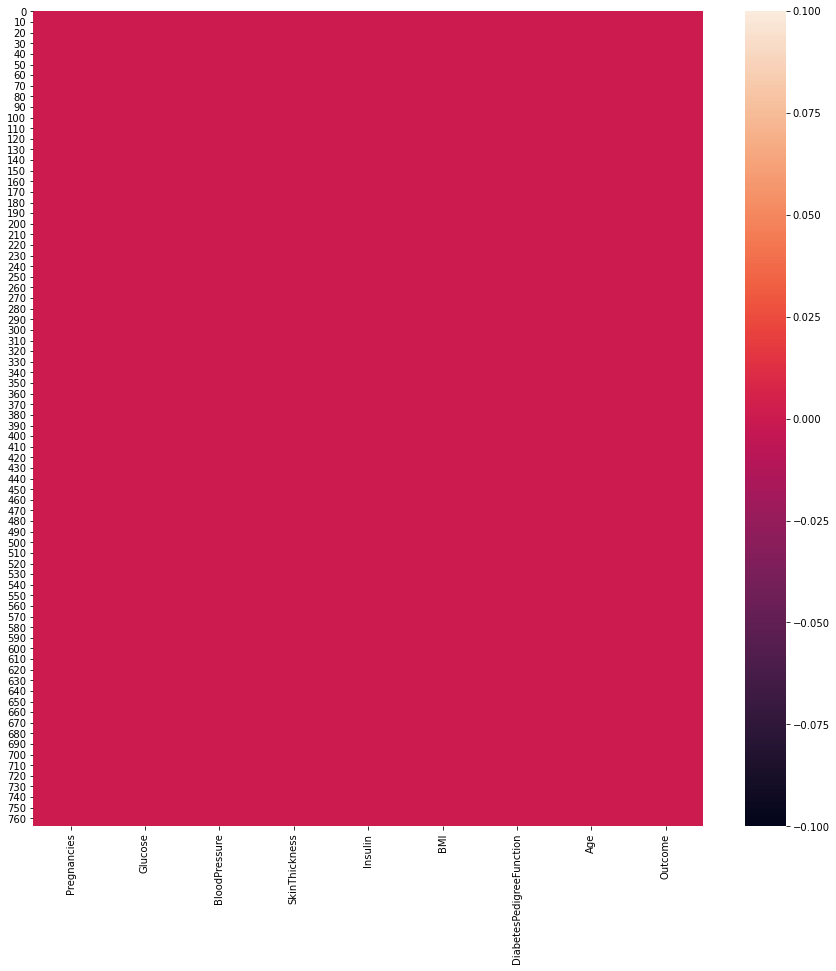

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
X = standardized_data
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=2, test_size=0.3)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [21]:
model_svm = svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [22]:
model_svm.predict(X_train)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [23]:
y_test

46     0
438    0
756    0
306    1
224    0
742    0
396    0
11     1
377    0
35     0
678    1
441    0
192    1
713    0
52     0
644    0
571    0
1      0
758    0
401    0
674    0
715    1
296    1
98     0
395    0
210    0
649    0
158    0
111    1
86     0
171    1
412    0
677    0
719    1
501    0
657    0
491    0
493    1
94     0
51     0
349    1
68     0
403    0
455    1
185    1
668    0
405    0
620    0
685    0
760    0
634    0
97     0
120    1
119    0
415    1
244    0
194    0
138    0
320    0
352    0
271    0
135    0
737    0
283    1
628    0
507    0
114    1
589    0
190    0
60     0
299    0
241    0
696    1
666    1
113    0
197    1
152    1
692    0
563    0
619    1
702    1
406    1
13     1
658    0
753    1
117    0
300    1
540    1
232    0
681    1
62     0
169    0
682    0
531    0
526    0
85     0
690    0
41     0
341    0
635    1
710    0
196    0
9      1
262    0
497    0
360    1
615    0
331    0
312    1
748    1
346    0
1

In [24]:
# Predict
classes = ['Yes', 'No']
for i in range(model_svm.predict(X_train).size):
    print(classes[model_svm.predict(X_train)[i]])

Yes
No
No
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
N

In [25]:
accuracy_train = accuracy_score(model_svm.predict(X_train), y_train)
print("Accuracy for Training data = ", accuracy_train)

Accuracy for Training data =  0.8268156424581006


In [26]:
model_svm.predict(X_test)
accuracy_test = accuracy_score(model_svm.predict(X_test), y_test)
print("Accuracy for Testing data = ", accuracy_test)

Accuracy for Testing data =  0.7662337662337663


In [27]:
input_data = (10,68,106,23,49,35.5,0.285,47)
type(input_data)

tuple

In [28]:
input_data_as_numpy_array = np.array(input_data)
type(input_data_as_numpy_array)

numpy.ndarray

In [29]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped

array([[ 10.   ,  68.   , 106.   ,  23.   ,  49.   ,  35.5  ,   0.285,
         47.   ]])

In [30]:
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 1.82781311 -1.65544783  1.90736425  0.15453319 -0.26742867  0.44515934
  -0.56438861  1.17073215]]


In [31]:
prediction = model_svm.predict(std_data)
print(prediction)
if prediction[0] == 0:
    print("Non-diabetic")
else:
    print("diabetic")

[0]
Non-diabetic


In [38]:
Pregnancies = int(input("Pregnancies = "))
Glucose = int(input("Glucose = "))
BloodPressure = int(input("Blood Pressure = "))
SkinThickness = int(input("Skin Thickness = "))
Insulin = int(input("Insulin = "))
BMI = float(input("BMI = "))
DiabetesPedigreeFunction = float(input("Diabetes Pedigree Function = "))
Age = int(input("Age = "))
input_data = (Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model_svm.predict(std_data)
if prediction[0] == 0:
    print("Patient-Non-Diabetic")
else:
    print("Patient-diabetic")

Pregnancies = 8
Glucose = 166
Blood Pressure = 108
Skin Thickness = 49
Insulin = 228
BMI = 37.9
Diabetes Pedigree Function = 0.166
Age = 33
Patient-diabetic
